In [111]:
pkg = mp.open_package('http://library.metatab.org/jhu.edu-covid19.csv')
pkg

# COVID-19 Data
`jhu.edu-covid19-4` Last Update: 2020-03-24T22:44:53

_COVID 19 cases data from Johns Hopkins, augmented and reformtted_


This dataset processed and augments the COVID-19 data provided by Johns Hopkins
University Center for Systems Science and Engineering (JHU CSSE). [The source
data is checked into Github
daily.](https://github.com/CSSEGISandData/COVID-19/) and is collected from a
variety of sources.

This dataset reformats the data into tidy format, with dates expressed as
values instead of column headings, and adds several fields that are useful for
analysis.

The 'rate_t5d' column is the growth date from 5 days before the observation to
the observation. For example, for a row with a current observation of value
x_5, and a past observation of x_0, the rate_t5d is calculated as
e^((log(x_5)-log(x_0)) / 5)-1 . The result is that x_5 = x_0 * (1+rate_t5d)^5,
and rate_t5d from the previous 5 days

## Caveats

* China's minimum cases in the dataset is 548, so it's value for days sincle
  100 cases is shifted by 6 days. It's just a guess, but it looks good. 
* Countries that haven't reached 100 cases yet will have a days since 100 cases
  value that is always negative.
## Documentation Links

* [John Hopkins Project Homepage](https://systems.jhu.edu/research/public-health/ncov/) 

 

## Contacts

* **Origin** [John Hopkins University Center for Systems Science and Engineering](https://systems.jhu.edu/)
* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [confirmed](http://library.metatab.org/jhu.edu-covid19-4/data/confirmed.csv)**. Confirmed cases by date and country
* ** [deaths](http://library.metatab.org/jhu.edu-covid19-4/data/deaths.csv)**. Deaths cases by date and country
* ** [recovered](http://library.metatab.org/jhu.edu-covid19-4/data/recovered.csv)**. Recoveries cases by date and country

## References
<ul><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/">ts_base_url</a></strong>. Base URL for time series data</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv">confirmed_ts_source</a></strong>. Source for time series of confirmed cases</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv">death_ts_source</a></strong>. Source for time series of deaths</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv">recov_ts_source</a></strong>. Source for time series of recoveries</li><ul>

'2020-03-23T22:21:16'

In [3]:
confirmed_df = pkg.resource('confirmed').dataframe()
confirmed_df.head()

,country,province,location,date,confirmed,date_10,days_10,date_100,days_100,rate_t5d,confirmed_log
0,Thailand,NaN,Thailand,2020-01-27,8,2020-01-28,-1,2020-03-15,-48,0.319508,2.197225
1,Thailand,NaN,Thailand,2020-01-28,14,2020-01-28,0,2020-03-15,-47,0.360822,2.708050
2,Thailand,NaN,Thailand,2020-01-29,14,2020-01-28,1,2020-03-15,-46,0.228660,2.708050
3,Thailand,NaN,Thailand,2020-01-30,14,2020-01-28,2,2020-03-15,-45,0.148698,2.708050
4,Thailand,NaN,Thailand,2020-01-31,19,2020-01-28,3,2020-03-15,-44,0.188865,2.995732


In [28]:
deaths_df = pkg.resource('deaths').dataframe()
deaths_df.head()

,country,province,location,date,death,date_10,days_10,date_100,days_100,rate_t5d,death_log
0,Italy,NaN,Italy,2020-01-27,0,2020-02-25,-29,2020-03-04,-37,NaN,0.0
1,Italy,NaN,Italy,2020-01-28,0,2020-02-25,-28,2020-03-04,-36,NaN,0.0
2,Italy,NaN,Italy,2020-01-29,0,2020-02-25,-27,2020-03-04,-35,NaN,0.0
3,Italy,NaN,Italy,2020-01-30,0,2020-02-25,-26,2020-03-04,-34,NaN,0.0
4,Italy,NaN,Italy,2020-01-31,0,2020-02-25,-25,2020-03-04,-33,NaN,0.0


,country,province,location,date,confirmed,date_10,days_10,date_100,days_100,rate_t5d,confirmed_log,double_days
448,Germany,NaN,Germany,2020-01-27,1,2020-02-02,-6,2020-03-01,-34,NaN,0.693147,NaN
449,Germany,NaN,Germany,2020-01-28,4,2020-02-02,-5,2020-03-01,-33,NaN,1.609438,NaN
450,Germany,NaN,Germany,2020-01-29,4,2020-02-02,-4,2020-03-01,-32,NaN,1.609438,NaN
451,Germany,NaN,Germany,2020-01-30,4,2020-02-02,-3,2020-03-01,-31,NaN,1.609438,NaN
452,Germany,NaN,Germany,2020-01-31,5,2020-02-02,-2,2020-03-01,-30,NaN,1.791759,NaN


Text(0, 0.5, 'Log Number of Cases')

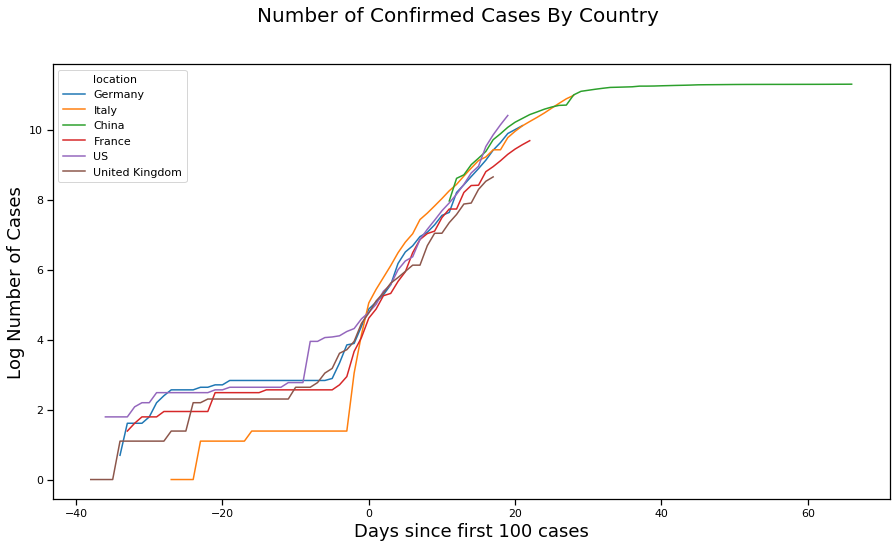

In [112]:

fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Number of Confirmed Cases By Country', fontsize=20)

t = confirmed_df
t = t[t.location.isin( ['Italy','US','Germany','France', 'United Kingdom','China'])]

display(t.head())
sns.lineplot(ax=ax, x='days_100',y='confirmed_log', data=t, hue='location', ci=None)
ax.set_xlabel('Days since first 100 cases', fontsize=18)
ax.set_ylabel('Log Number of Cases', fontsize=18)


Text(0, 0.5, 'Rate of Growth')

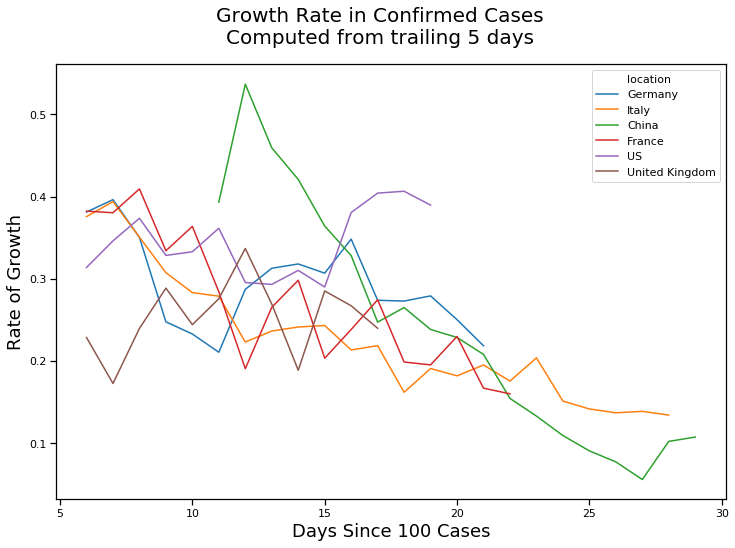

In [74]:

t = t[t.location.isin( ['Italy','US','Germany','France', 'United Kingdom', 'China'])]

fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Growth Rate in Confirmed Cases\nComputed from trailing 5 days', fontsize=20)

sns.lineplot(ax=ax, x='days_100',y='rate_t5d', data=t, hue='location', ci=None)
ax.set_xlabel('Days Since 100 Cases', fontsize=18)
ax.set_ylabel('Rate of Growth', fontsize=18)



Text(0, 0.5, 'Number of Days to Double')

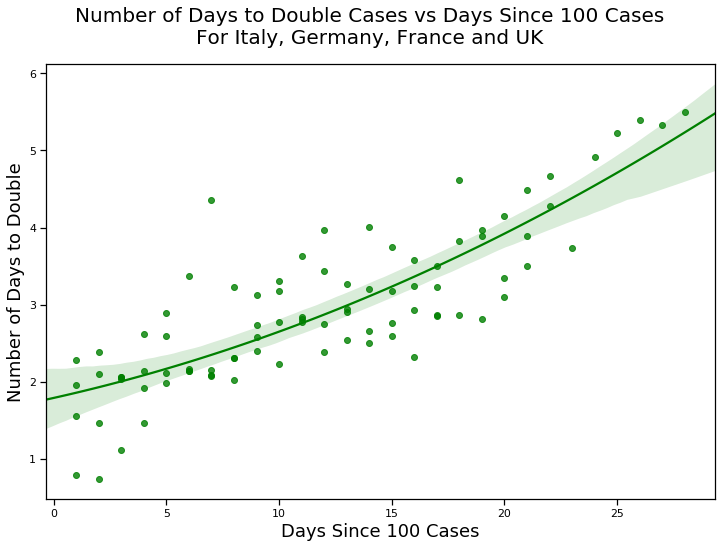

In [5]:
confirmed_df['double_days'] = np.log(2)/np.log(1+confirmed_df.rate_t5d)
confirmed_df.sort_values('double_days', ascending=False)

t = confirmed_df[(confirmed_df.days_100 > 0) & (confirmed_df.days_100 < 30) 
                 & (confirmed_df.double_days < 100) & (confirmed_df.double_days > 0)]

t = t[t.location.isin(  ['Italy','Germany','France', 'United Kingdom'])]

fig, ax = plt.subplots(figsize=(12,8))

ax = sns.regplot(x=t.days_100, y=t.double_days, color="g", order=2, ax=ax)

fig.suptitle('Number of Days to Double Cases vs Days Since 100 Cases\n'
             'For Italy, Germany, France and UK',
             fontsize=20)


ax.set_xlabel('Days Since 100 Cases', fontsize=18)
ax.set_ylabel('Number of Days to Double', fontsize=18)


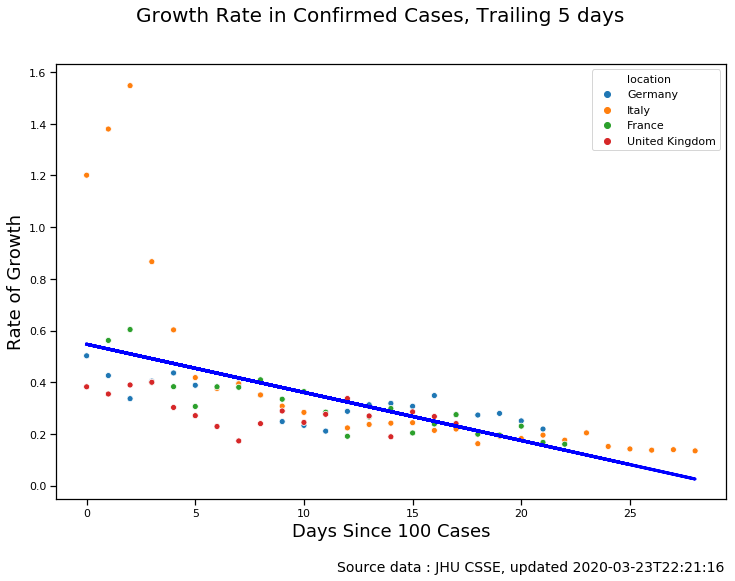

Coefficients: [[-0.01863331]] [0.54691016]
Correlation: -0.590282305113244
Zero growth at 29.35120149335761 days


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa9b98890f0>)

In [109]:
from sklearn import  linear_model

def plot_growth_reg_100(t, y_col, ax = None, subtitle=''):
    
    x = t.days_100.values.reshape(len(t), 1)
    y = t[y_col].values.reshape(len(t), 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    if not ax:
        fig, ax = plt.subplots(figsize=(12,8))
        fig.suptitle('Growth Rate in Confirmed Cases, Trailing 5 days' +("\n"+subtitle if subtitle else ''),
                 fontsize=20)

    sns.scatterplot(ax=ax, x='days_100',y=y_col, data=t, hue='location', ci=None)
    ax.plot(x, regr.predict(x), color='blue', linewidth=3)

    ax.set_xlabel('Days Since 100 Cases', fontsize=18)
    ax.set_ylabel('Rate of Growth', fontsize=18)

    plt.gcf().text(.45,0, f"Source data : JHU CSSE, updated {pkg['Root'].find_first('root.modified').value} ", fontsize=14) 
    plt.show()

    print('Coefficients:', regr.coef_, regr.intercept_)
    print("Correlation:", t.days_100.corr(t.rate_t5d))

    m = regr.coef_[0][0]
    b = regr.intercept_[0]
  
    print(f"Zero growth at {-b/m} days")
    
    return fig, ax
    
t = confirmed_df[(confirmed_df.days_100<30) & (confirmed_df.confirmed>100)] 
t = t[t.location.isin( ['Italy','Germany','France', 'United Kingdom'])]

plot_growth_reg_100(t,'rate_t5d')


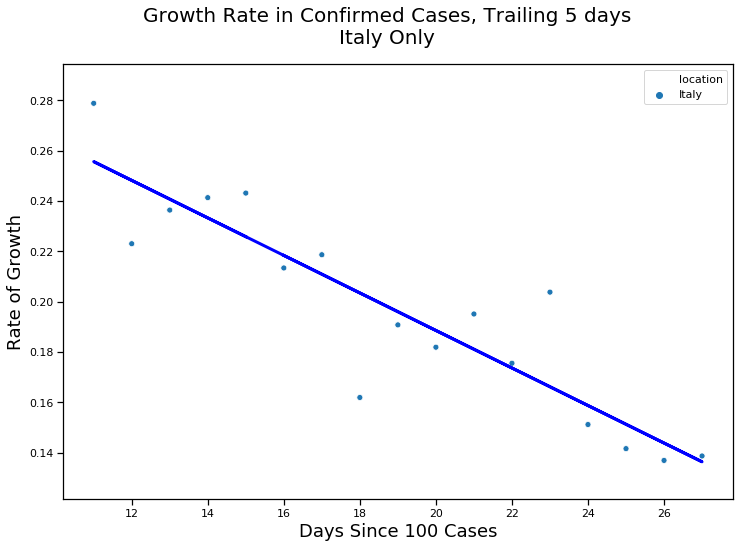

Coefficients: [[-0.00745135]] [0.33762501]
Correlation: -0.9010642178674715
Zero growth at 45.31060378742271 days


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa9c9188438>)

In [86]:
t = confirmed_df[(confirmed_df.days_10<30) & (confirmed_df.days_100>10)] 
t = t[t.location.isin( ['Italy'])]

plot_growth_reg_100(t, 'rate_t5d', subtitle="Italy Only")


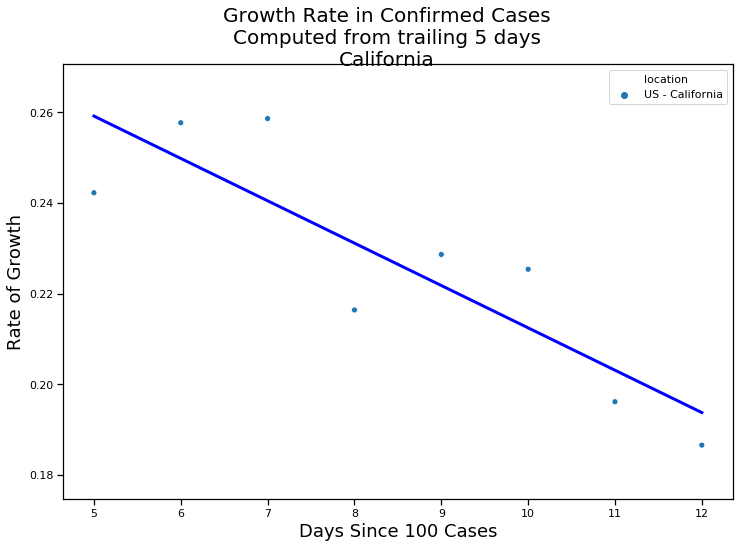

Coefficients: [[-0.00934113]] [0.30587209]
Correlation: -0.8672288202386292
Zero growth at 32.74467216327782 days


In [64]:

t = confirmed_df[(confirmed_df.days_100<30) & (confirmed_df.days_100>0)] 

t = t[t.location.isin([ 'US - California' ])]
t = t.dropna()

plot_growth_reg_100(t, 'rate_t5d', "California")


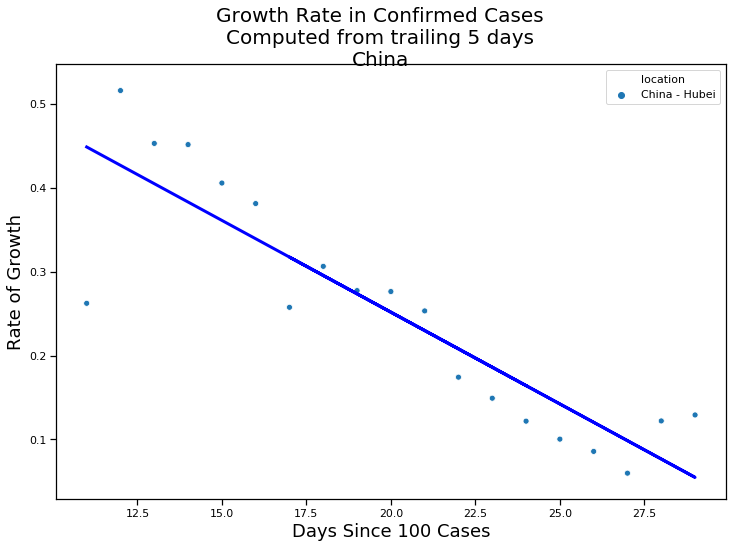

Coefficients: [[-0.02187934]] [0.68931518]
Correlation: -0.8861417834826952
Zero growth at 31.505303981914224 days


In [78]:
t = confirmed_df[(confirmed_df.days_100<30) & (confirmed_df.days_100>0)] 

t = t[t.location.isin([ 'China - Hubei' ])]
t = t.dropna()

plot_growth_reg_100(t, 'rate_t5d', "China")


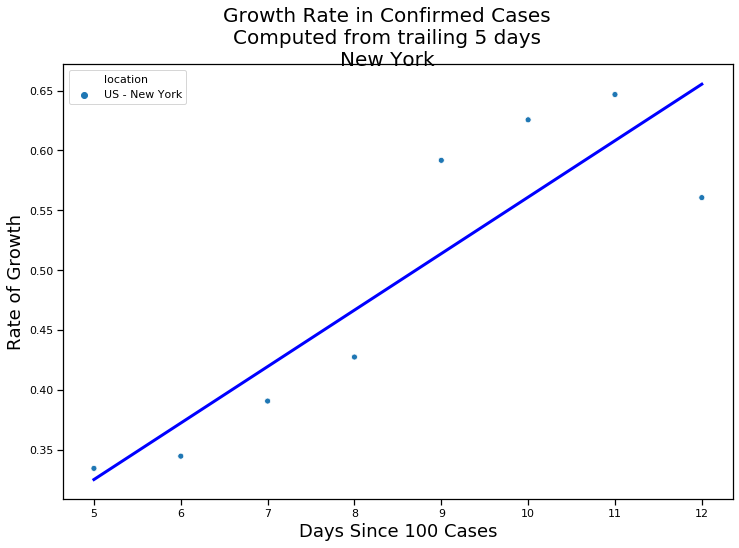

Coefficients: [[0.04718089]] [0.08920004]
Correlation: 0.8922926153025101
Zero growth at -1.8905966251560213 days


In [79]:
t = confirmed_df[(confirmed_df.days_100<30) & (confirmed_df.days_100>0)] 

t = t[t.location.isin([ 'US - New York' ])]
t = t.dropna()

plot_growth_reg_100(t, 'rate_t5d', "New York")

,rate_t5d
location,
US - New York,0.490238
US,0.344662
US - California,0.226473
US - Colorado,0.222097
US - Massachusetts,0.187209
US - Washington,0.170832


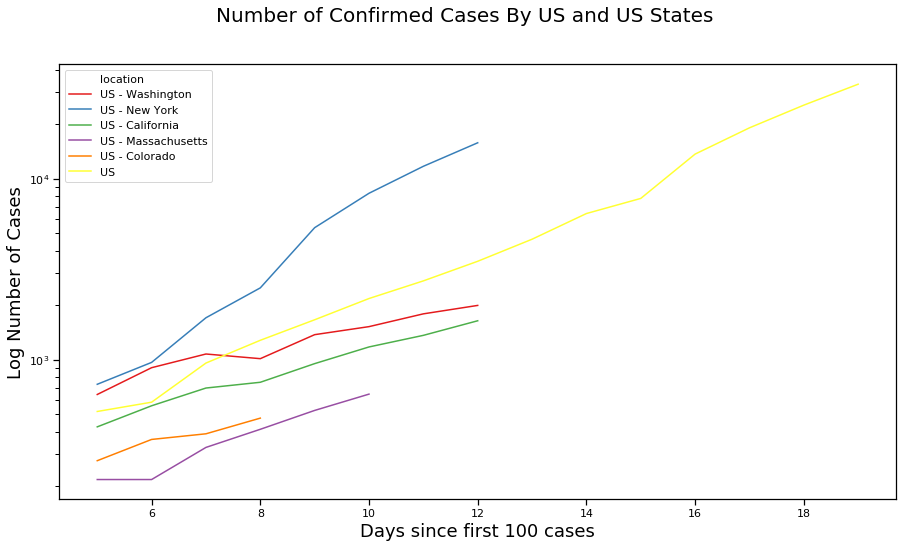

In [89]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Number of Confirmed Cases By US and US States', fontsize=20)

t = confirmed_df[(confirmed_df.days_100<30) & (confirmed_df.days_100>=5)] 

t = t[t.country == 'US']
t = t[t.location.isin(['US','US - Washington', 'US - New York', 'US - California',
                       'US - Massachusetts', 'US - Colorado' ])]

sns.lineplot(ax=ax, x='days_100',y='confirmed', data=t, hue='location', palette='Set1', ci=None)
ax.set_xlabel('Days since first 100 cases', fontsize=18)
ax.set_ylabel('Log Number of Cases', fontsize=18)
ax.set_yscale('log')

rate_tab = t.groupby('location')[['location','rate_t5d']].mean().sort_values('rate_t5d', ascending=False)
display(rate_tab)

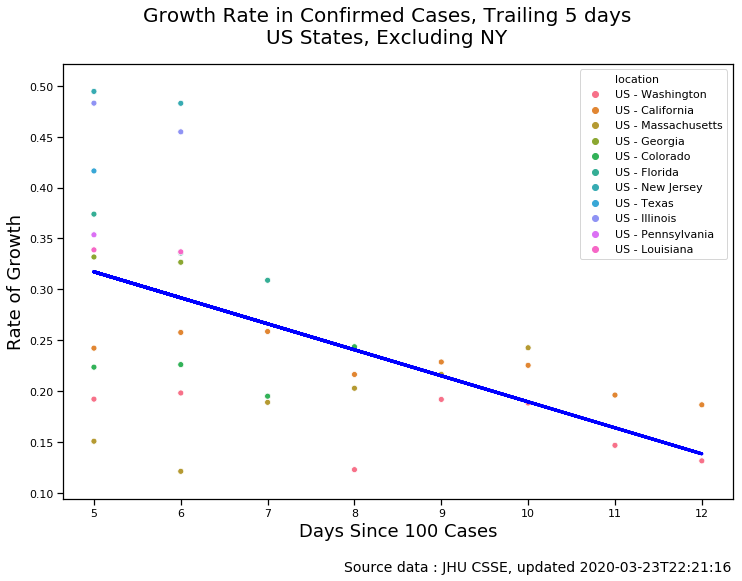

Coefficients: [[-0.0255442]] [0.44499114]
Correlation: -0.536693132685075
Zero growth at 17.420435429294994 days


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa97a16d588>)

In [110]:
t = confirmed_df[(confirmed_df.days_100<30) & (confirmed_df.days_100>=5)] 

t = t[(t.country == 'US') & (~t.location.isin(['US', 'US - New York'])) ]

plot_growth_reg_100(t, 'rate_t5d', subtitle='US States, Excluding NY')




,rate_t5d
location,
US - New York,0.610093
US,0.273035


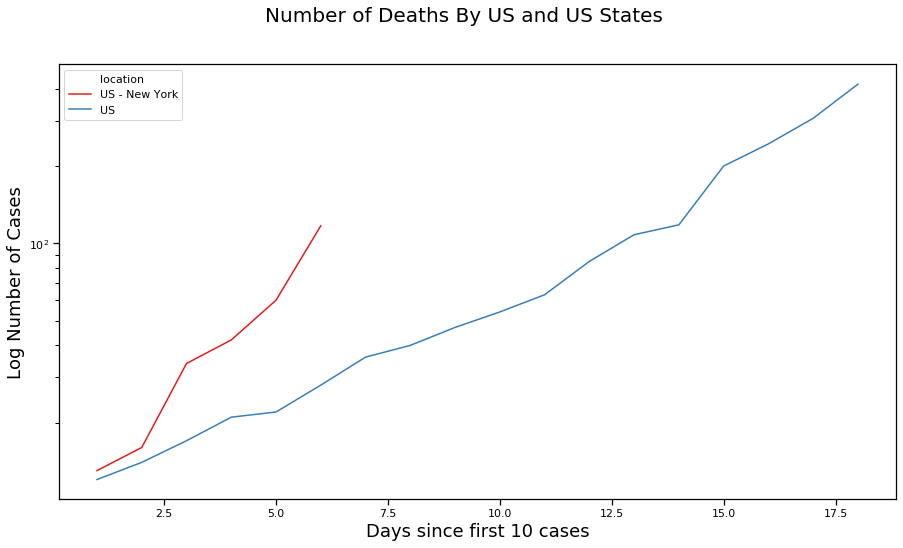

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Number of Deaths By US and US States', fontsize=20)

t = death_df[(death_df.days_10<30) & (death_df.days_10>0)] 
t = t[t.location.isin(['US','US - Washington', 'US - New York', 'US - California',
                       'US - Massachusetts' ])]

sns.lineplot(ax=ax, x='days_10',y='death', data=t, hue='location', palette='Set1', ci=None)
ax.set_xlabel('Days since first 10 cases', fontsize=18)
ax.set_ylabel('Log Number of Cases', fontsize=18)
ax.set_yscale('log')

rate_tab = t.groupby('location')[['location','rate_t5d']].mean().sort_values('rate_t5d', ascending=False)
display(rate_tab)

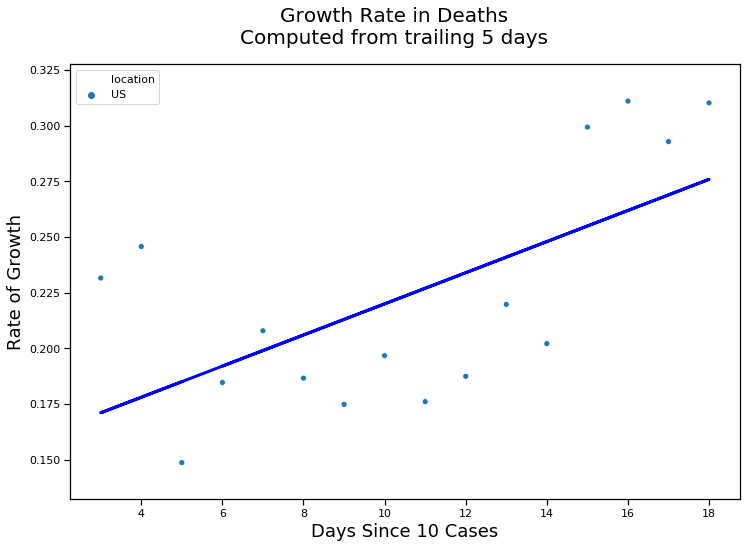

Coefficients: [[0.00698858]] [0.15009859]
Correlation: 0.6279874450594393
Zero growth at -21.477687728172466 days


In [71]:


def plot_growth_reg_10(t, y_col, subtitle=''):
    
    t = t.dropna(subset=[y_col,'days_10'])
    
    x = t.days_10.values.reshape(len(t), 1)
    y = t[y_col].values.reshape(len(t), 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    fig, ax = plt.subplots(figsize=(12,8))
    fig.suptitle('Growth Rate in Deaths\nComputed from trailing 5 days' +("\n"+subtitle if subtitle else ''),
                 fontsize=20)

    sns.scatterplot(ax=ax, x='days_10',y=y_col, data=t, hue='location', ci=None)
    ax.plot(x, regr.predict(x), color='blue', linewidth=3)

    ax.set_xlabel('Days Since 10 Cases', fontsize=18)
    ax.set_ylabel('Rate of Growth', fontsize=18)

    plt.show()

    print('Coefficients:', regr.coef_, regr.intercept_)
    print("Correlation:", t.days_10.corr(t.rate_t5d))

    m = regr.coef_[0][0]
    b = regr.intercept_[0]
  
    print(f"Zero growth at {-b/m} days")
    
death_df = pkg.resource('deaths').dataframe()
    
t = death_df[(death_df.days_10>2) & (death_df.days_10<30)] 
t = t[t.location.isin( ['US'])]
    
plot_growth_reg_10(t,'rate_t5d')

,country,province,location,date,death,date_10,days_10,date_100,days_100,rate_t5d,death_log
